In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
### ƒê·ªçc d·ªØ li·ªáu
# Y√™u c·∫ßu t·∫£i file data,csv v·ªÅ th∆∞ m·ª•c project
data = pd.read_csv("data.csv", keep_default_na=False)

# Hi·ªÉn th·ªã t√™n c√°c c·ªôt
columns_list = [[index + 1, column] for index, column in enumerate(data.columns.tolist())]
print("Danh s√°ch c√°c c·ªôt trong d·ªØ li·ªáu:")
print(tabulate(columns_list, headers=["STT", "T√™n c·ªôt"], tablefmt="pretty"))
print()

print("Th√¥ng tin th·ªëng k√™ d·ªØ li·ªáu:")
print(data.info())
print("\nTh·ªëng k√™ m√¥ t·∫£:")
print(data.describe())
print()

# X·ª≠ l√Ω d·ªØ li·ªáu l·ªói
print("Ki·ªÉm tra gi√° tr·ªã thi·∫øu:")
print(data.isnull().sum())
data = data.dropna()
# Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu
print("\nKi·ªÉu d·ªØ li·ªáu c·ªßa t·ª´ng c·ªôt:")
print(data.dtypes)
# Ki·ªÉm tra c√°c gi√° tr·ªã b·∫•t th∆∞·ªùng (v√≠ d·ª• c·ªôt tu·ªïi)
print("\nKi·ªÉm tra gi√° tr·ªã b·∫•t th∆∞·ªùng (v√≠ d·ª• c·ªôt tu·ªïi):")
print(data[data["age"] < 0])

# Onehot coding c√°c c·ªôt ph√¢n lo·∫°i
categorical_cols = [
    "gender",
    "region",
    "income_level",
    "smoking_status",
    "alcohol_consumption",
    "dietary_habits",
    "physical_activity",
    "air_pollution_exposure",
    "stress_level",
    "EKG_results",
]

data_encoded = pd.get_dummies(data, columns=categorical_cols)

# T√°ch ƒë·∫∑c tr∆∞ng v√† nh√£n
X = data_encoded.drop("heart_attack", axis=1)
y = data_encoded["heart_attack"]

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nD·ªØ li·ªáu sau khi chu·∫©n h√≥a (5 d√≤ng ƒë·∫ßu):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Danh s√°ch c√°c c·ªôt trong d·ªØ li·ªáu:
+-----+--------------------------------+
| STT |            T√™n c·ªôt             |
+-----+--------------------------------+
|  1  |              age               |
|  2  |             gender             |
|  3  |             region             |
|  4  |          income_level          |
|  5  |          hypertension          |
|  6  |            diabetes            |
|  7  |       cholesterol_level        |
|  8  |            obesity             |
|  9  |      waist_circumference       |
| 10  |         family_history         |
| 11  |         smoking_status         |
| 12  |      alcohol_consumption       |
| 13  |       physical_activity        |
| 14  |         dietary_habits         |
| 15  |     air_pollution_exposure     |
| 16  |          stress_level          |
| 17  |          sleep_hours           |
| 18  |    blood_pressure_systolic     |
| 19  |    blood_pressure_diastolic    |
| 20  |      fasting_blood_sugar       |
| 21  |      


Th·ªëng k√™ t·ªïng qu√°t:
‚Üí T·ªïng s·ªë m·∫´u: 300
‚Üí S·ªë tr∆∞·ªùng ƒë·∫∑c tr∆∞ng (feature): 43
‚Üí Trung b√¨nh t·ªïng th·ªÉ (sau chu·∫©n h√≥a): 0.0000
‚Üí ƒê·ªô l·ªách chu·∫©n t·ªïng th·ªÉ (sau chu·∫©n h√≥a): 1.0000

Th·ªëng k√™ c√°c th√†nh ph·∫ßn PCA:
                PC1           PC2           PC3           PC4           PC5  \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean  -1.776357e-17 -9.473903e-17 -5.921189e-18 -3.552714e-17  3.552714e-17   
std    1.620738e+00  1.553604e+00  1.544705e+00  1.494052e+00  1.440335e+00   
min   -3.913948e+00 -3.772827e+00 -4.327810e+00 -3.726064e+00 -3.601007e+00   
25%   -1.142854e+00 -1.122230e+00 -1.015823e+00 -1.081492e+00 -9.008877e-01   
50%   -1.805091e-02 -6.323288e-02  7.105848e-02  4.887350e-02  3.759932e-02   
75%    1.184455e+00  1.105920e+00  1.163139e+00  1.033669e+00  9.374221e-01   
max    3.907223e+00  4.541961e+00  3.713522e+00  3.866921e+00  4.115291e+00   

                PC6          

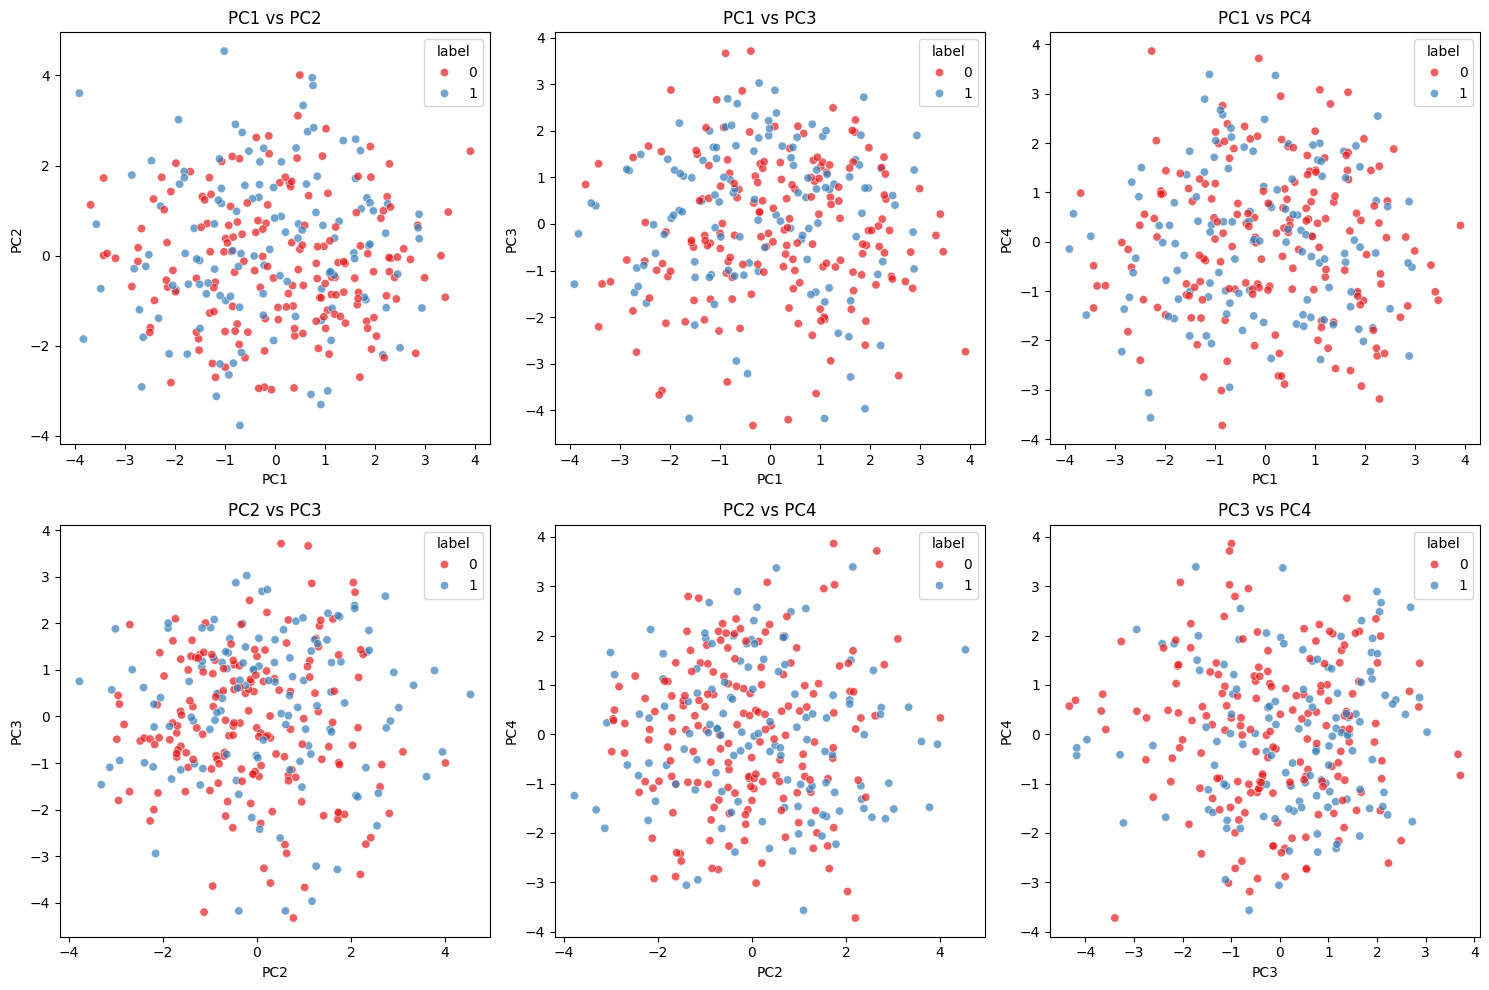


Ph∆∞∆°ng sai gi·∫£i th√≠ch t·ª´ng th√†nh ph·∫ßn PCA:
PC 1: 0.0609
PC 2: 0.0559
PC 3: 0.0553
PC 4: 0.0517
PC 5: 0.0481
PC 6: 0.0475
T·ªïng ph∆∞∆°ng sai gi·∫£i th√≠ch PCA: 0.9610 (v√≠ d·ª• 0.95 t∆∞∆°ng ·ª©ng 95%)


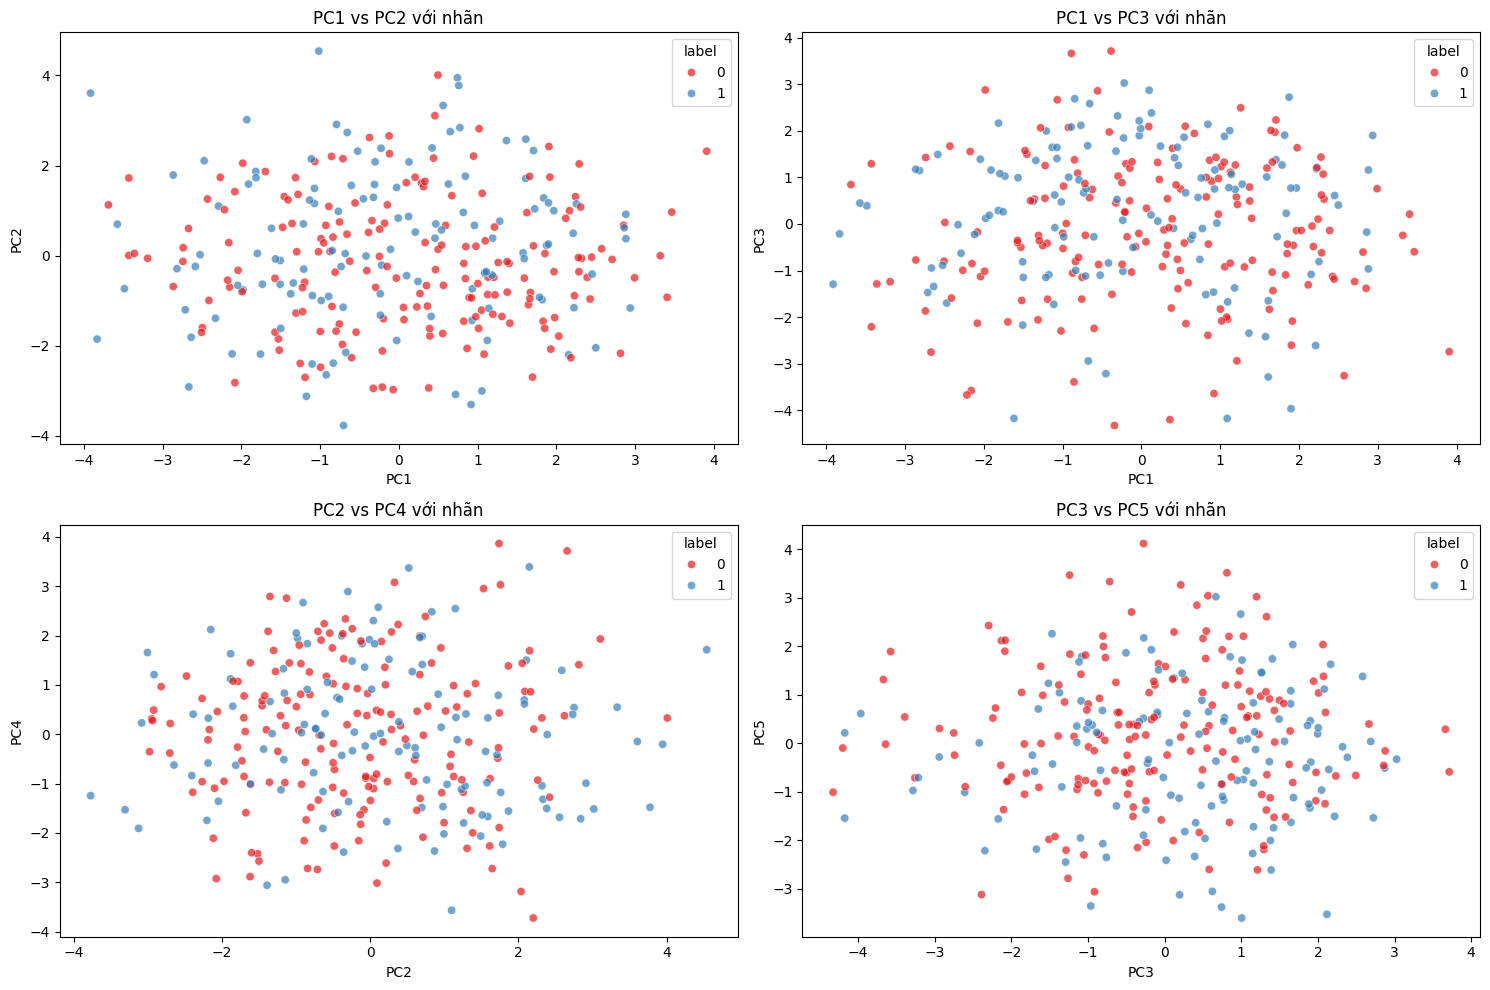


Th·ªëng k√™ th√†nh ph·∫ßn ch√≠nh t·ª´ LDA:
                LD1
count  3.000000e+02
mean  -5.980401e-16
std    1.234660e+00
min   -3.191687e+00
25%   -9.516308e-01
50%   -8.373391e-02
75%    7.035801e-01
max    3.480741e+00

Ph∆∞∆°ng sai gi·∫£i th√≠ch t·ª´ng th√†nh ph·∫ßn LDA:
Th√†nh ph·∫ßn 1: 1.0000
T·ªïng ph∆∞∆°ng sai gi·∫£i th√≠ch LDA: 1.0000


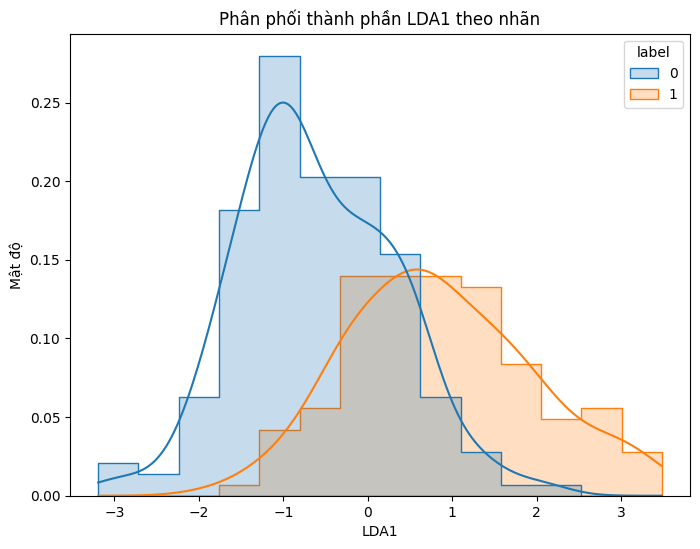


So s√°nh PCA vs LDA:


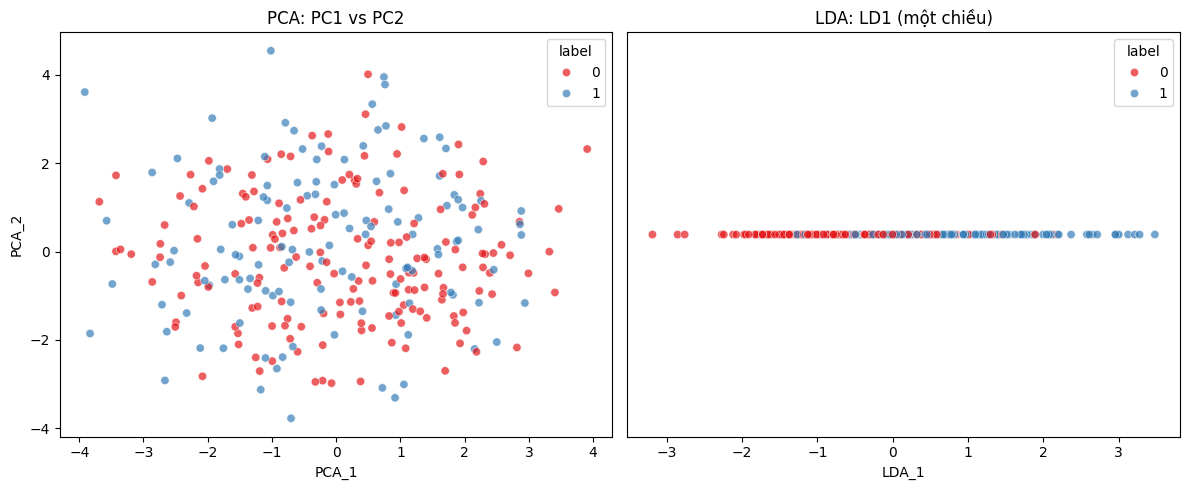

In [27]:
### Ph√¢n t√≠ch c√°c tham s·ªë th·ªëng k√™ c·ªßa d·ªØ li·ªáu
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nTh·ªëng k√™ t·ªïng qu√°t:")
print(f"‚Üí T·ªïng s·ªë m·∫´u: {X.shape[0]}")
print(f"‚Üí S·ªë tr∆∞·ªùng ƒë·∫∑c tr∆∞ng (feature): {X.shape[1]}")
print(f"‚Üí Trung b√¨nh t·ªïng th·ªÉ (sau chu·∫©n h√≥a): {X_scaled_df.values.mean():.4f}")
print(f"‚Üí ƒê·ªô l·ªách chu·∫©n t·ªïng th·ªÉ (sau chu·∫©n h√≥a): {X_scaled_df.values.std():.4f}")

### Ph∆∞∆°ng ph√°p PCA

pca = PCA(n_components=0.95) # T·ª± ƒë·ªông ch·ªçn s·ªë chi·ªÅu gi·ªØ l·∫°i 95% ph∆∞∆°ng sai
X_reduced_PCA = pca.fit_transform(X_scaled)

# ƒê√°nh gi√° c√°c th√†nh ph·∫ßn ch√≠nh sau PCA
X_pca_df = pd.DataFrame(X_reduced_PCA, columns=[f'PC{i+1}' for i in range(X_reduced_PCA.shape[1])])
print("\nTh·ªëng k√™ c√°c th√†nh ph·∫ßn PCA:")
print(X_pca_df.describe())

# PCA v·ªõi 6 th√†nh ph·∫ßn ch√≠nh
pca_vis = PCA(n_components=6)
X_pca_vis = pca_vis.fit_transform(X_scaled)

# T·∫°o DataFrame ƒë·ªÉ ti·ªán tr·ª±c quan
pca_df = pd.DataFrame(X_pca_vis, columns=[f"PC{i+1}" for i in range(6)])
pca_df['label'] = y

# Hi·ªÉn th·ªã 6 bi·ªÉu ƒë·ªì scatter cho 6 c·∫∑p th√†nh ph·∫ßn ch√≠nh ƒë·∫ßu ti√™n
pair_indices = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
plt.figure(figsize=(15, 10))
for idx, (i, j) in enumerate(pair_indices):
    plt.subplot(2, 3, idx+1)
    sns.scatterplot(data=pca_df, x=f'PC{i+1}', y=f'PC{j+1}', hue='label', palette='Set1', alpha=0.7)
    plt.title(f'PC{i+1} vs PC{j+1}')
    plt.xlabel(f'PC{i+1}')
    plt.ylabel(f'PC{j+1}')
plt.tight_layout()
plt.show()

# Ph∆∞∆°ng sai gi·∫£i th√≠ch c·ªßa t·ª´ng th√†nh ph·∫ßn
print("\nPh∆∞∆°ng sai gi·∫£i th√≠ch t·ª´ng th√†nh ph·∫ßn PCA:")
for i, var_ratio in enumerate(pca_vis.explained_variance_ratio_):
    print(f"PC {i+1}: {var_ratio:.4f}")

# T·ªïng ph∆∞∆°ng sai gi·∫£i th√≠ch (l∆∞·ª£ng th√¥ng tin ƒë∆∞·ª£c gi·ªØ l·∫°i)
total_explained_variance_pca = pca.explained_variance_ratio_.sum()
print(f"T·ªïng ph∆∞∆°ng sai gi·∫£i th√≠ch PCA: {total_explained_variance_pca:.4f} (v√≠ d·ª• 0.95 t∆∞∆°ng ·ª©ng 95%)")

# Scatter plot
pair_indices = [(0,1), (0,2), (1,3), (2,4)]  # v√≠ d·ª• ch·ªçn 4 c·∫∑p PC ƒë·ªÉ xem
plt.figure(figsize=(15, 10))
for idx, (i, j) in enumerate(pair_indices):
    plt.subplot(2, 2, idx+1)
    sns.scatterplot(data=pca_df, x=f'PC{i+1}', y=f'PC{j+1}', hue='label', palette='Set1', alpha=0.7)
    plt.title(f'PC{i+1} vs PC{j+1} v·ªõi nh√£n')
plt.tight_layout()
plt.show()

### Ph∆∞∆°ng ph√°p LDA

lda = LDA(n_components=1)  # V√¨ c√≥ 2 l·ªõp => t·ªëi ƒëa l√† 1
X_reduced_LDA = lda.fit_transform(X_scaled, y)

# ƒê√°nh gi√° c√°c th√†nh ph·∫ßn ch√≠nh sau LDA
X_lda_df = pd.DataFrame(X_reduced_LDA, columns=["LD1"])
print("\nTh·ªëng k√™ th√†nh ph·∫ßn ch√≠nh t·ª´ LDA:")
print(X_lda_df.describe())

# Ph∆∞∆°ng sai gi·∫£i th√≠ch c·ªßa t·ª´ng th√†nh ph·∫ßn
print("\nPh∆∞∆°ng sai gi·∫£i th√≠ch t·ª´ng th√†nh ph·∫ßn LDA:")
for i, var_ratio in enumerate(lda.explained_variance_ratio_):
    print(f"Th√†nh ph·∫ßn {i+1}: {var_ratio:.4f}")

# T·ªïng ph∆∞∆°ng sai gi·∫£i th√≠ch (l∆∞·ª£ng th√¥ng tin ƒë∆∞·ª£c gi·ªØ l·∫°i)
total_explained_variance_lda = lda.explained_variance_ratio_.sum()
print(f"T·ªïng ph∆∞∆°ng sai gi·∫£i th√≠ch LDA: {total_explained_variance_lda:.4f}")

# T·∫°o DataFrame ch·ª©a k·∫øt qu·∫£ LDA v√† nh√£n
lda_df = pd.DataFrame(X_reduced_LDA, columns=['LDA1'])
lda_df['label'] = y

# Histogram so s√°nh ph√¢n ph·ªëi LDA1 theo nh√£n
plt.figure(figsize=(8,6))
sns.histplot(data=lda_df, x='LDA1', hue='label', kde=True, element='step', stat='density')
plt.title('Ph√¢n ph·ªëi th√†nh ph·∫ßn LDA1 theo nh√£n')
plt.xlabel('LDA1')
plt.ylabel('M·∫≠t ƒë·ªô')
plt.show()


# T·∫°o DataFrame ƒë·ªÉ so s√°nh PCA vs LDA
print("\nSo s√°nh PCA vs LDA:")
df_compare = pd.DataFrame({
    'PCA_1': X_reduced_PCA[:, 0],
    'PCA_2': X_reduced_PCA[:, 1] if X_reduced_PCA.shape[1] > 1 else np.zeros_like(X_reduced_PCA[:, 0]),
    'LDA_1': X_reduced_LDA[:, 0],
    'label': y
})

# Scatter plot PCA (PC1 vs PC2)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_compare, x='PCA_1', y='PCA_2', hue='label', palette='Set1', alpha=0.7)
plt.title('PCA: PC1 vs PC2')

# Scatter plot LDA (LD1)
plt.subplot(1,2,2)
sns.scatterplot(data=df_compare, x='LDA_1', y=np.zeros_like(df_compare['LDA_1']), hue='label', palette='Set1', alpha=0.7)
plt.title('LDA: LD1 (m·ªôt chi·ªÅu)')
plt.yticks([])  # ·∫®n tr·ª•c y v√¨ ch·ªâ 1 chi·ªÅu
plt.tight_layout()
plt.show()

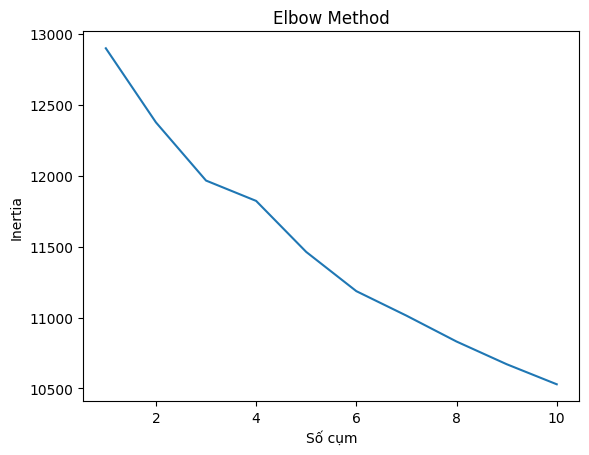

Thu·∫≠t to√°n KMeans h·ªôi t·ª• sau 19 l·∫ßn c·∫≠p nh·∫≠t.
Thu·∫≠t to√°n GMM h·ªôi t·ª• sau 31 l·∫ßn l·∫∑p.

--- Th·ªëng k√™ c√°c ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o theo c·ª•m KMeans ---
            feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
C·ª•m_KMeans                                                                     
0           -0.180619  -0.126026   0.014040   0.191183  -0.123120  -0.089545   
1            0.050028   0.203838  -0.046415  -0.137685  -0.006174  -0.023152   
2            0.100203  -0.085194   0.031258  -0.028264   0.105285   0.093708   

            feature_6  feature_7  feature_8  feature_9  ...  feature_35  \
C·ª•m_KMeans                                              ...               
0           -0.056632   0.074156   0.039589   0.089538  ...   -0.010915   
1           -0.028005  -0.108538  -0.018971  -0.309490  ...    0.125358   
2            0.071534   0.039659  -0.014613   0.211724  ...   -0.106270   

            feature_36  feature_37  featu

In [28]:
# Ph∆∞∆°ng ph√°p Elbow ƒë·ªÉ x√°c ƒë·ªãnh s·ªë c·ª•m t·ªëi ∆∞u
inertia = []
for k in range(1, 11):  # t·ª´ 1 ƒë·∫øn 10 c·ª•m
    kmeans = KMeans(n_clusters=k, random_state=42)  # ƒê·∫£m b·∫£o t√≠nh l·∫∑p l·∫°i k·∫øt qu·∫£
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# V·∫Ω bi·ªÉu ƒë·ªì Elbow
plt.plot(range(1, 11), inertia)
plt.xlabel('S·ªë c·ª•m')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Ch·ªçn s·ªë c·ª•m t·ªëi ∆∞u d·ª±a tr√™n k·∫øt qu·∫£ Elbow
optimal_k = 3

### Th·ª±c hi·ªán ph√¢n c·ª•m v·ªõi s·ªë c·ª•m t·ªëi ∆∞u
# K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(f"Thu·∫≠t to√°n KMeans h·ªôi t·ª• sau {kmeans.n_iter_} l·∫ßn c·∫≠p nh·∫≠t.")

# GMM
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
print(f"Thu·∫≠t to√°n GMM h·ªôi t·ª• sau {gmm.n_iter_} l·∫ßn l·∫∑p.")

# T·∫°o DataFrame ch·ª©a d·ªØ li·ªáu ƒë·∫ßu v√†o, nh√£n c·ª•m v√† ƒë·∫ßu ra
df = pd.DataFrame(X_scaled, columns=[f'feature_{i}' for i in range(X_scaled.shape[1])])
df['C·ª•m_KMeans'] = kmeans_labels
df['C·ª•m_GMM'] = gmm_labels
df['ƒê·∫ßu_ra'] = y  # gi·∫£ s·ª≠ y c√≥ c√πng s·ªë m·∫´u v·ªõi X

# Nh·∫≠n x√©t ƒë·ªãnh l∆∞·ª£ng v·ªõi KMeans
print("\n--- Th·ªëng k√™ c√°c ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o theo c·ª•m KMeans ---")
print(df.groupby('C·ª•m_KMeans').mean(numeric_only=True))

print("\n--- Th·ªëng k√™ bi·∫øn ƒë·∫ßu ra theo c·ª•m KMeans ---")
print(df.groupby('C·ª•m_KMeans')['ƒê·∫ßu_ra'].describe())

# Nh·∫≠n x√©t ƒë·ªãnh l∆∞·ª£ng v·ªõi GMM
print("\n--- Th·ªëng k√™ c√°c ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o theo c·ª•m GMM ---")
print(df.groupby('C·ª•m_GMM').mean(numeric_only=True))

print("\n--- Th·ªëng k√™ bi·∫øn ƒë·∫ßu ra theo c·ª•m GMM ---")
print(df.groupby('C·ª•m_GMM')['ƒê·∫ßu_ra'].describe())


B·∫Øt ƒë·∫ßu m√¥ h√¨nh LinearSVC...

=== K·∫øt qu·∫£ tr√™n D·ªÆ LI·ªÜU: G·ªëc ===


‚û°Ô∏è  T·ªâ l·ªá train:test = 4:1 (80:20)

Ma tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):
+-------------------+-------------------+-------------+
|                   | D·ª± ƒëo√°n: Kh√¥ng b·ªã | D·ª± ƒëo√°n: B·ªã |
+-------------------+-------------------+-------------+
| Th·ª±c t·∫ø: Kh√¥ng b·ªã |        28         |      5      |
|    Th·ª±c t·∫ø: B·ªã    |        12         |     15      |
+-------------------+-------------------+-------------+

K·∫øt qu·∫£ tr√™n t·∫≠p test:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Label        ‚îÇ Precision   ‚îÇ Recall   ‚îÇ   F1-Score ‚îÇ   Support ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚

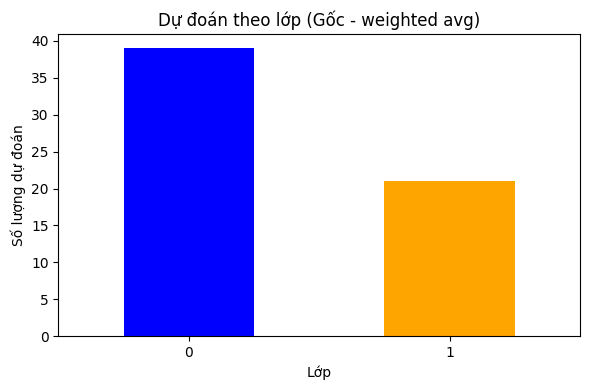


‚û°Ô∏è  T·ªâ l·ªá train:test = 7:3 (70:30)

Ma tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):
+-------------------+-------------------+-------------+
|                   | D·ª± ƒëo√°n: Kh√¥ng b·ªã | D·ª± ƒëo√°n: B·ªã |
+-------------------+-------------------+-------------+
| Th·ª±c t·∫ø: Kh√¥ng b·ªã |        42         |     11      |
|    Th·ª±c t·∫ø: B·ªã    |        15         |     22      |
+-------------------+-------------------+-------------+

K·∫øt qu·∫£ tr√™n t·∫≠p test:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Label        ‚îÇ Precision   ‚îÇ Recall   ‚îÇ   F1-Score ‚îÇ   Support ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0            ‚îÇ 0.74        ‚îÇ 0.79     ‚î

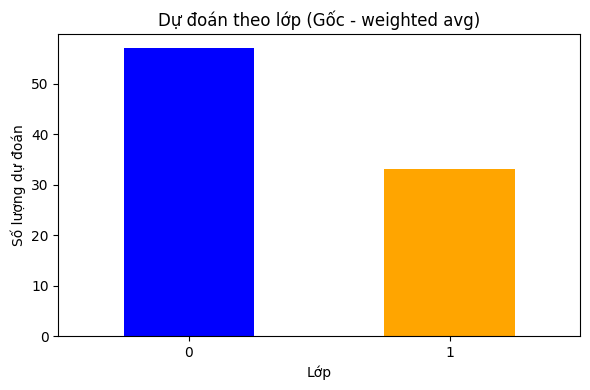


‚û°Ô∏è  T·ªâ l·ªá train:test = 6:4 (60:40)

Ma tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):
+-------------------+-------------------+-------------+
|                   | D·ª± ƒëo√°n: Kh√¥ng b·ªã | D·ª± ƒëo√°n: B·ªã |
+-------------------+-------------------+-------------+
| Th·ª±c t·∫ø: Kh√¥ng b·ªã |        60         |     14      |
|    Th·ª±c t·∫ø: B·ªã    |        20         |     26      |
+-------------------+-------------------+-------------+

K·∫øt qu·∫£ tr√™n t·∫≠p test:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Label        ‚îÇ Precision   ‚îÇ Recall   ‚îÇ   F1-Score ‚îÇ   Support ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0            ‚îÇ 0.75        ‚îÇ 0.81     ‚î

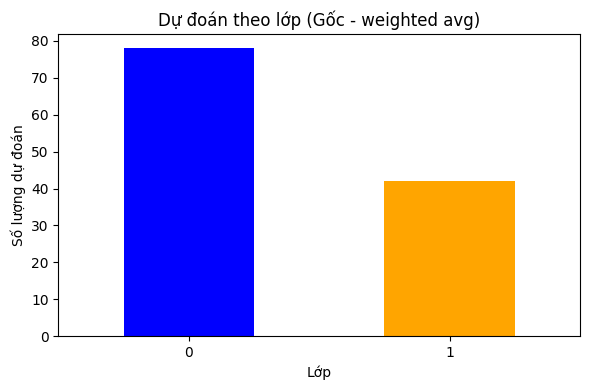


=== K·∫øt qu·∫£ tr√™n D·ªÆ LI·ªÜU: Gi·∫£m chi·ªÅu PCA ===


‚û°Ô∏è  T·ªâ l·ªá train:test = 4:1 (80:20)

Ma tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):
+-------------------+-------------------+-------------+
|                   | D·ª± ƒëo√°n: Kh√¥ng b·ªã | D·ª± ƒëo√°n: B·ªã |
+-------------------+-------------------+-------------+
| Th·ª±c t·∫ø: Kh√¥ng b·ªã |        27         |      6      |
|    Th·ª±c t·∫ø: B·ªã    |        12         |     15      |
+-------------------+-------------------+-------------+

K·∫øt qu·∫£ tr√™n t·∫≠p test:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Label        ‚îÇ Precision   ‚îÇ Recall   ‚îÇ   F1-Score ‚îÇ   Support ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚

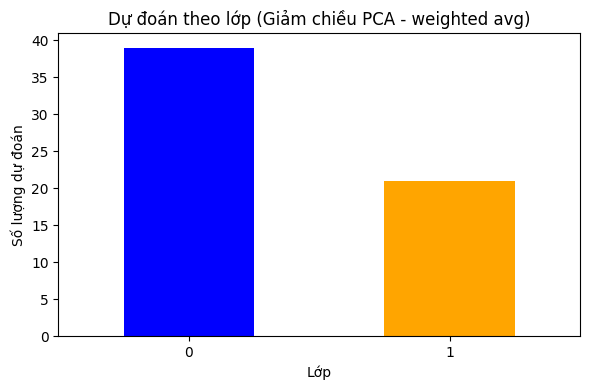


‚û°Ô∏è  T·ªâ l·ªá train:test = 7:3 (70:30)

Ma tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):
+-------------------+-------------------+-------------+
|                   | D·ª± ƒëo√°n: Kh√¥ng b·ªã | D·ª± ƒëo√°n: B·ªã |
+-------------------+-------------------+-------------+
| Th·ª±c t·∫ø: Kh√¥ng b·ªã |        44         |      9      |
|    Th·ª±c t·∫ø: B·ªã    |        20         |     17      |
+-------------------+-------------------+-------------+

K·∫øt qu·∫£ tr√™n t·∫≠p test:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Label        ‚îÇ Precision   ‚îÇ Recall   ‚îÇ   F1-Score ‚îÇ   Support ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0            ‚îÇ 0.69        ‚îÇ 0.83     ‚î

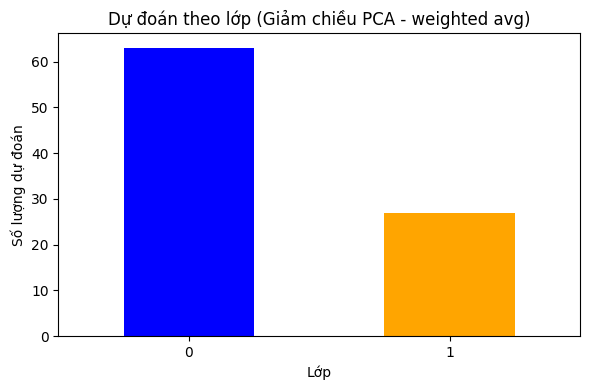


‚û°Ô∏è  T·ªâ l·ªá train:test = 6:4 (60:40)

Ma tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):
+-------------------+-------------------+-------------+
|                   | D·ª± ƒëo√°n: Kh√¥ng b·ªã | D·ª± ƒëo√°n: B·ªã |
+-------------------+-------------------+-------------+
| Th·ª±c t·∫ø: Kh√¥ng b·ªã |        57         |     17      |
|    Th·ª±c t·∫ø: B·ªã    |        25         |     21      |
+-------------------+-------------------+-------------+

K·∫øt qu·∫£ tr√™n t·∫≠p test:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Label        ‚îÇ Precision   ‚îÇ Recall   ‚îÇ   F1-Score ‚îÇ   Support ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0            ‚îÇ 0.70        ‚îÇ 0.77     ‚î

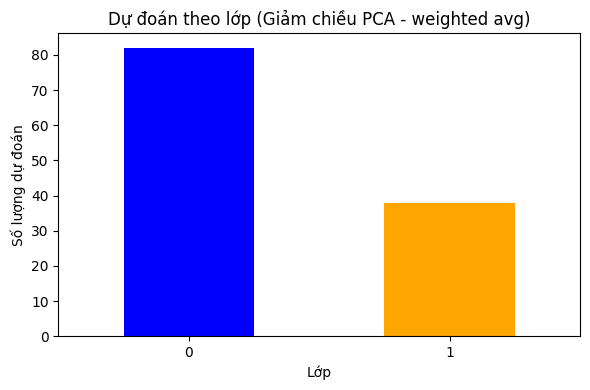


=== K·∫øt qu·∫£ tr√™n D·ªÆ LI·ªÜU: Gi·∫£m chi·ªÅu LDA ===


‚û°Ô∏è  T·ªâ l·ªá train:test = 4:1 (80:20)

Ma tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):
+-------------------+-------------------+-------------+
|                   | D·ª± ƒëo√°n: Kh√¥ng b·ªã | D·ª± ƒëo√°n: B·ªã |
+-------------------+-------------------+-------------+
| Th·ª±c t·∫ø: Kh√¥ng b·ªã |        28         |      5      |
|    Th·ª±c t·∫ø: B·ªã    |         9         |     18      |
+-------------------+-------------------+-------------+

K·∫øt qu·∫£ tr√™n t·∫≠p test:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Label        ‚îÇ Precision   ‚îÇ Recall   ‚îÇ   F1-Score ‚îÇ   Support ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚

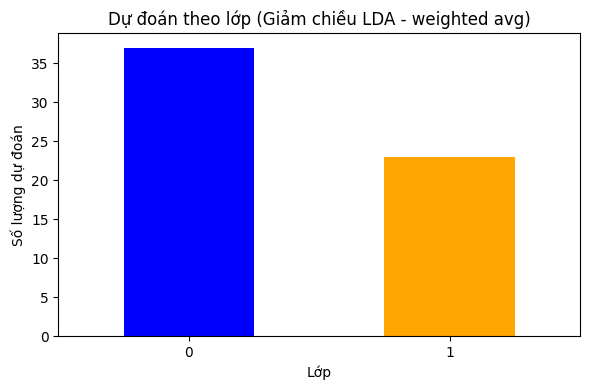


‚û°Ô∏è  T·ªâ l·ªá train:test = 7:3 (70:30)

Ma tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):
+-------------------+-------------------+-------------+
|                   | D·ª± ƒëo√°n: Kh√¥ng b·ªã | D·ª± ƒëo√°n: B·ªã |
+-------------------+-------------------+-------------+
| Th·ª±c t·∫ø: Kh√¥ng b·ªã |        45         |      8      |
|    Th·ª±c t·∫ø: B·ªã    |        11         |     26      |
+-------------------+-------------------+-------------+

K·∫øt qu·∫£ tr√™n t·∫≠p test:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Label        ‚îÇ Precision   ‚îÇ Recall   ‚îÇ   F1-Score ‚îÇ   Support ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0            ‚îÇ 0.80        ‚îÇ 0.85     ‚î

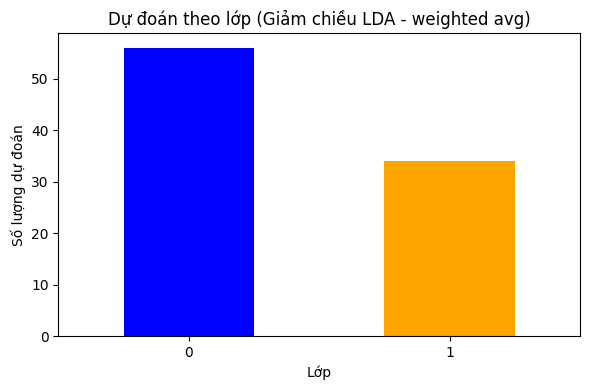


‚û°Ô∏è  T·ªâ l·ªá train:test = 6:4 (60:40)

Ma tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):
+-------------------+-------------------+-------------+
|                   | D·ª± ƒëo√°n: Kh√¥ng b·ªã | D·ª± ƒëo√°n: B·ªã |
+-------------------+-------------------+-------------+
| Th·ª±c t·∫ø: Kh√¥ng b·ªã |        60         |     14      |
|    Th·ª±c t·∫ø: B·ªã    |        15         |     31      |
+-------------------+-------------------+-------------+

K·∫øt qu·∫£ tr√™n t·∫≠p test:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Label        ‚îÇ Precision   ‚îÇ Recall   ‚îÇ   F1-Score ‚îÇ   Support ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0            ‚îÇ 0.80        ‚îÇ 0.81     ‚î

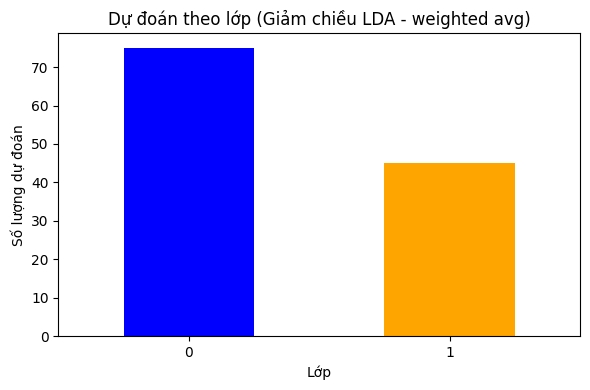


=====K·∫øt th√∫c m√¥ h√¨nh=====


In [29]:
# List t·ª∑ l·ªá chia
ratios = [0.2, 0.3, 0.4]  # t∆∞∆°ng ·ª©ng: 4:1, 7:3, 6:4
ratio_labels = ['4:1 (80:20)', '7:3 (70:30)', '6:4 (60:40)']

# D·ªØ li·ªáu c·∫ßn th·ª≠ (g·ªëc v√† PCA)
datasets = {
    'G·ªëc': X_scaled,
    'Gi·∫£m chi·ªÅu PCA': X_reduced_PCA,
    'Gi·∫£m chi·ªÅu LDA': X_reduced_LDA
}
while True:
    method = input("\nCh·ªçn m√¥ h√¨nh ƒë·ªÉ ch·∫°y (1 = LinearSVC, 2 = Logistic Regression, 3 = KNN, 4 = Tho√°t): ")
    
    
    if method == '1':
        print("\nB·∫Øt ƒë·∫ßu m√¥ h√¨nh LinearSVC...")
    elif method == '2':
        print("\nB·∫Øt ƒë·∫ßu m√¥ h√¨nh Logistic Regression...")
    elif method == '3':
        print("\nB·∫Øt ƒë·∫ßu m√¥ h√¨nh KNN...")
    elif method == '4':
        break
    
    for data_label, X in datasets.items():
        print(f"\n=== K·∫øt qu·∫£ tr√™n D·ªÆ LI·ªÜU: {data_label} ===\n")
        for ratio, label in zip(ratios, ratio_labels):
            print(f"\n‚û°Ô∏è  T·ªâ l·ªá train:test = {label}")
            
            # Chia d·ªØ li·ªáu
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=ratio, random_state=42
            )

            # Hu·∫•n luy·ªán
            if method == '1':
                clf = LinearSVC(max_iter=10000)
            
            elif method == '2':
                clf = LogisticRegression(max_iter=1000, solver='lbfgs')
            
            else:
                clf = KNeighborsClassifier(n_neighbors=5)
                
            clf.fit(X_train, y_train)

            # D·ª± ƒëo√°n
            y_pred = clf.predict(X_test)

            # Ma tr·∫≠n nh·∫ßm l·∫´n
            cm = confusion_matrix(y_test, y_pred)
            headers = ["", "D·ª± ƒëo√°n: Kh√¥ng b·ªã", "D·ª± ƒëo√°n: B·ªã"]
            table = [
                ["Th·ª±c t·∫ø: Kh√¥ng b·ªã", cm[0][0], cm[0][1]],
                ["Th·ª±c t·∫ø: B·ªã",        cm[1][0], cm[1][1]]
            ]
            print("\nMa tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p test):")
            print(tabulate(table, headers=headers, tablefmt="pretty"))

            # B√°o c√°o ph√¢n lo·∫°i
            report_dict = classification_report(y_test, y_pred, output_dict=True)
            table = []
            total_support = len(y_test)
            for label, metrics in report_dict.items():
                if isinstance(metrics, dict):
                    row = [label]
                    row += [f"{metrics[col]:.2f}" for col in ["precision", "recall", "f1-score", "support"]]
                    table.append(row)
                elif label == "accuracy":
                    table.append(["accuracy", "", "", f"{metrics:.2f}", f"{total_support}"])

            headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]
            print("\nK·∫øt qu·∫£ tr√™n t·∫≠p test:")
            print(tabulate(table, headers=headers, tablefmt="fancy_grid"))
            
            # Ma tr·∫≠n nh·∫ßm l·∫´n cho t·∫≠p hu·∫•n luy·ªán
            y_train_pred = clf.predict(X_train)
            cm_train = confusion_matrix(y_train, y_train_pred)
            headers = ["", "D·ª± ƒëo√°n: Kh√¥ng b·ªã", "D·ª± ƒëo√°n: B·ªã"]
            table_train = [
                ["Th·ª±c t·∫ø: Kh√¥ng b·ªã", cm_train[0][0], cm_train[0][1]],
                ["Th·ª±c t·∫ø: B·ªã",        cm_train[1][0], cm_train[1][1]]
            ]
            print("\nMa tr·∫≠n nh·∫ßm l·∫´n (T·∫≠p hu·∫•n luy·ªán):")
            print(tabulate(table_train, headers=headers, tablefmt="pretty"))
        

            # B√°o c√°o ph√¢n lo·∫°i cho t·∫≠p hu·∫•n luy·ªán
            train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
            train_table = []
            train_total_support = len(y_train)
            for label, metrics in train_report_dict.items():
                if isinstance(metrics, dict):
                    row = [label]
                    row += [f"{metrics[col]:.2f}" for col in ["precision", "recall", "f1-score", "support"]]
                    train_table.append(row)
                elif label == "accuracy":
                    train_table.append(["accuracy", "", "", f"{metrics:.2f}", f"{train_total_support}"])

            train_headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]
            print("\nK·∫øt qu·∫£ tr√™n t·∫≠p hu·∫•n luy·ªán:")
            print(tabulate(train_table, headers=train_headers, tablefmt="fancy_grid"))
            
            # ƒê√°nh gi√° overfitting
            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            print(f"\nAccuracy tr√™n t·∫≠p hu·∫•n luy·ªán: {train_accuracy:.4f}")
            print(f"Accuracy tr√™n t·∫≠p ki·ªÉm tra: {accuracy_score(y_test, y_pred):.4f}")
            if train_accuracy > accuracy_score(y_test, y_pred) + 0.031:
                print("C√≥ d·∫•u hi·ªáu overfitting! √Åp d·ª•ng ƒëi·ªÅu ch·ªânh...")
                if method == '1':  # LinearSVC
                    clf = LinearSVC(C=0.1, max_iter=10000)
                elif method == '2':  # Logistic
                    clf = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2', C=0.1)
                else:  # KNN
                    clf = KNeighborsClassifier(n_neighbors=7, weights='distance')
                
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                test_accuracy = accuracy_score(y_test, y_pred)
                print(f"‚úÖ Accuracy sau khi hi·ªáu ch·ªânh: {test_accuracy:.4f}")
            else: print("Kh√¥ng c√≥ d·∫•u hi·ªáu overfitting")

            # Bi·ªÉu ƒë·ªì s·ªë l∆∞·ª£ng d·ª± ƒëo√°n theo l·ªõp
            class_counts = pd.Series(y_pred).value_counts()
            plt.figure(figsize=(6, 4))
            class_counts.plot(kind='bar', color=['blue', 'orange'])
            plt.title(f'D·ª± ƒëo√°n theo l·ªõp ({data_label} - {label})')
            plt.xlabel('L·ªõp')
            plt.ylabel('S·ªë l∆∞·ª£ng d·ª± ƒëo√°n')
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()        
    print("\n=====K·∫øt th√∫c m√¥ h√¨nh=====")

S·ªë m·∫´u train: 180
S·ªë m·∫´u test: 120
H·ªá s·ªë t∆∞∆°ng quan gi·ªØa th·ª±c t·∫ø v√† d·ª± ƒëo√°n: 0.48680191715042015


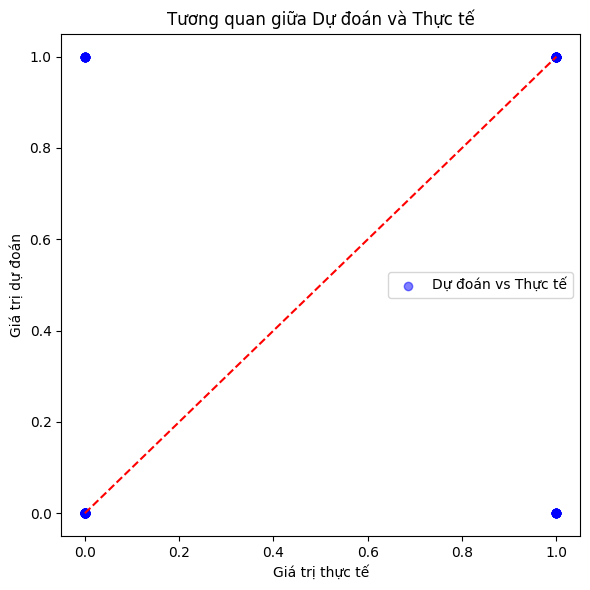

In [30]:
# Tr·ª±c quan h√≥a t∆∞∆°ng quan gi·ªØa th·ª±c t·∫ø v√† d·ª± ƒëo√°n
print(f"S·ªë m·∫´u train: {len(y_train)}")
print(f"S·ªë m·∫´u test: {len(y_test)}")
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f'H·ªá s·ªë t∆∞∆°ng quan gi·ªØa th·ª±c t·∫ø v√† d·ª± ƒëo√°n: {correlation}')
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='D·ª± ƒëo√°n vs Th·ª±c t·∫ø')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # ƒê∆∞·ªùng ch√©o
plt.xlabel('Gi√° tr·ªã th·ª±c t·∫ø')
plt.ylabel('Gi√° tr·ªã d·ª± ƒëo√°n')
plt.title('T∆∞∆°ng quan gi·ªØa D·ª± ƒëo√°n v√† Th·ª±c t·∫ø')
plt.legend()
plt.tight_layout()
plt.show()



===== CHUY·ªÇN B√ÄI TO√ÅN PH√ÇN LO·∫†I ‚Üí H·ªíI QUY (theo x√°c su·∫•t b·ªã b·ªánh) =====

=== K·∫øt qu·∫£ tr√™n D·ªÆ LI·ªÜU: G·ªëc ===


‚û°Ô∏è  T·ªâ l·ªá train:test = 4:1 (80:20)

‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Linear Regression
‚úÖ MSE (Mean Squared Error): 0.0063
‚úÖ R¬≤ Score: 0.9298


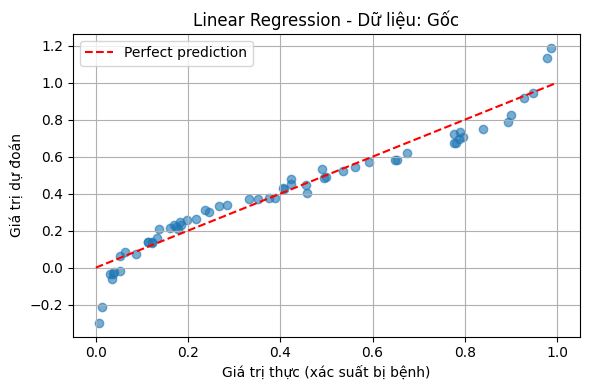


‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Ridge Regression
‚úÖ MSE (Mean Squared Error): 0.0062
‚úÖ R¬≤ Score: 0.9305


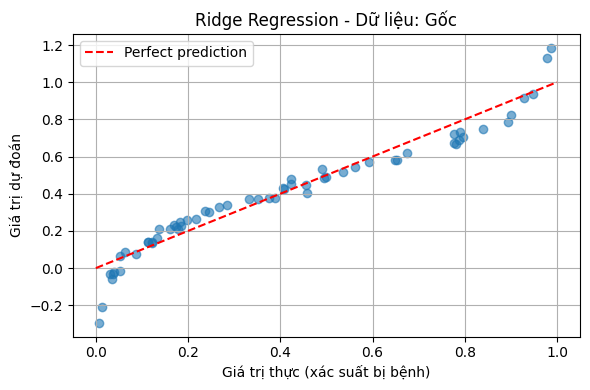


‚û°Ô∏è  T·ªâ l·ªá train:test = 7:3 (70:30)

‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Linear Regression
‚úÖ MSE (Mean Squared Error): 0.0072
‚úÖ R¬≤ Score: 0.9124


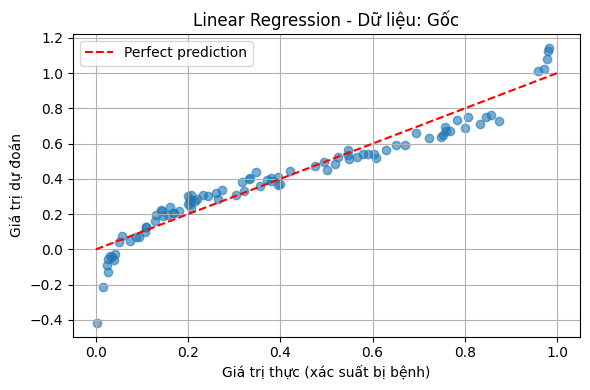


‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Ridge Regression
‚úÖ MSE (Mean Squared Error): 0.0071
‚úÖ R¬≤ Score: 0.9133


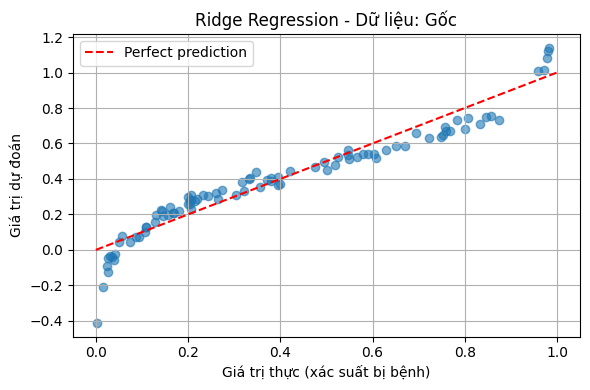


‚û°Ô∏è  T·ªâ l·ªá train:test = 6:4 (60:40)

‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Linear Regression
‚úÖ MSE (Mean Squared Error): 0.0064
‚úÖ R¬≤ Score: 0.9239


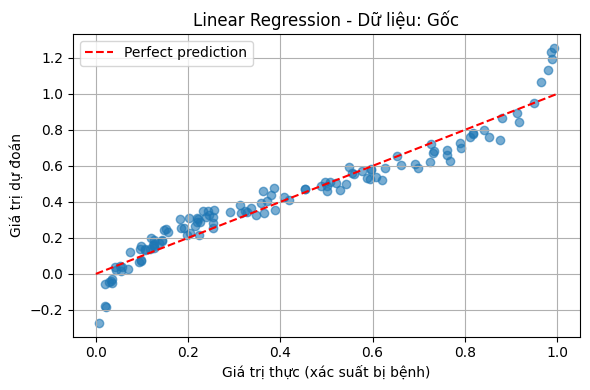


‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Ridge Regression
‚úÖ MSE (Mean Squared Error): 0.0063
‚úÖ R¬≤ Score: 0.9249


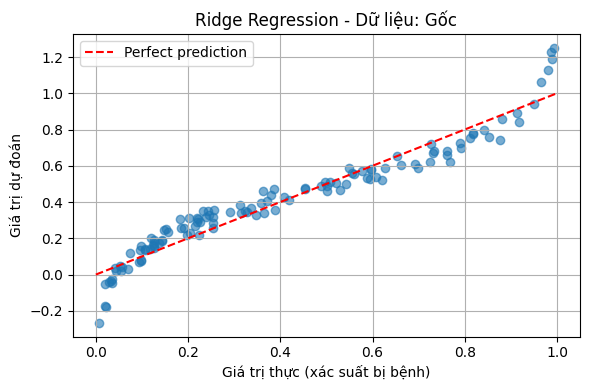


=== K·∫øt qu·∫£ tr√™n D·ªÆ LI·ªÜU: Gi·∫£m chi·ªÅu PCA ===


‚û°Ô∏è  T·ªâ l·ªá train:test = 4:1 (80:20)

‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Linear Regression
‚úÖ MSE (Mean Squared Error): 0.0023
‚úÖ R¬≤ Score: 0.9642

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu PCA', m√¥ h√¨nh 'Linear Regression':
   - MSE hi·ªán t·∫°i: 0.0023, R¬≤ hi·ªán t·∫°i: 0.9642
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0063, R¬≤ tham chi·∫øu: 0.9298
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


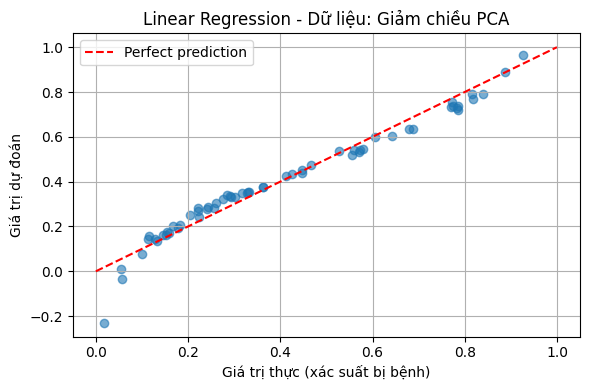


‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Ridge Regression
‚úÖ MSE (Mean Squared Error): 0.0023
‚úÖ R¬≤ Score: 0.9642

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu PCA', m√¥ h√¨nh 'Ridge Regression':
   - MSE hi·ªán t·∫°i: 0.0023, R¬≤ hi·ªán t·∫°i: 0.9642
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0062, R¬≤ tham chi·∫øu: 0.9305
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


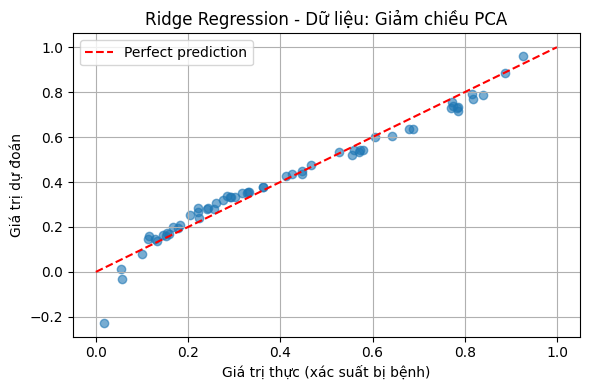


‚û°Ô∏è  T·ªâ l·ªá train:test = 7:3 (70:30)

‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Linear Regression
‚úÖ MSE (Mean Squared Error): 0.0035
‚úÖ R¬≤ Score: 0.9445

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu PCA', m√¥ h√¨nh 'Linear Regression':
   - MSE hi·ªán t·∫°i: 0.0035, R¬≤ hi·ªán t·∫°i: 0.9445
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0072, R¬≤ tham chi·∫øu: 0.9124
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


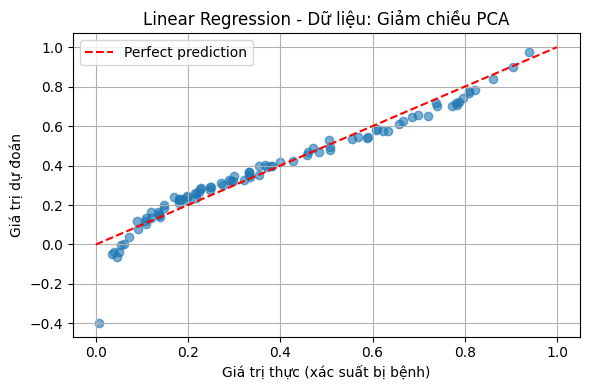


‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Ridge Regression
‚úÖ MSE (Mean Squared Error): 0.0035
‚úÖ R¬≤ Score: 0.9449

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu PCA', m√¥ h√¨nh 'Ridge Regression':
   - MSE hi·ªán t·∫°i: 0.0035, R¬≤ hi·ªán t·∫°i: 0.9449
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0071, R¬≤ tham chi·∫øu: 0.9133
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


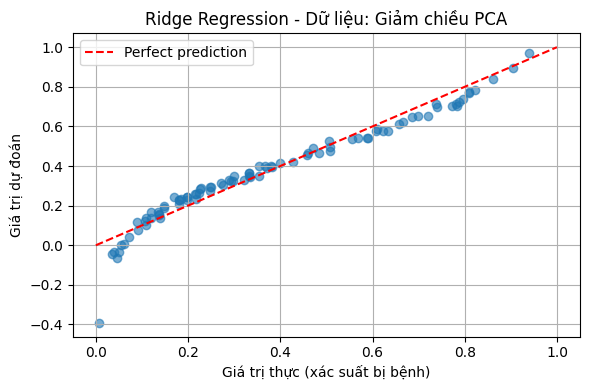


‚û°Ô∏è  T·ªâ l·ªá train:test = 6:4 (60:40)

‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Linear Regression
‚úÖ MSE (Mean Squared Error): 0.0023
‚úÖ R¬≤ Score: 0.9613

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu PCA', m√¥ h√¨nh 'Linear Regression':
   - MSE hi·ªán t·∫°i: 0.0023, R¬≤ hi·ªán t·∫°i: 0.9613
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0064, R¬≤ tham chi·∫øu: 0.9239
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


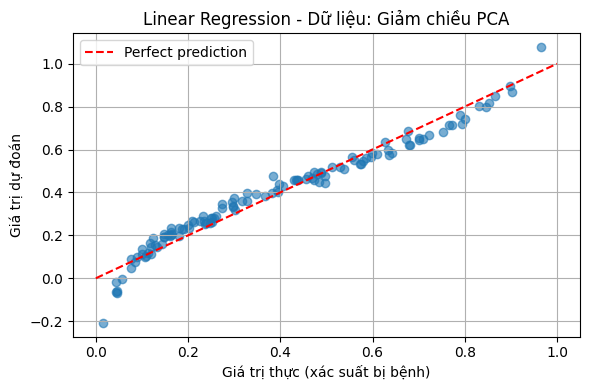


‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Ridge Regression
‚úÖ MSE (Mean Squared Error): 0.0023
‚úÖ R¬≤ Score: 0.9609

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu PCA', m√¥ h√¨nh 'Ridge Regression':
   - MSE hi·ªán t·∫°i: 0.0023, R¬≤ hi·ªán t·∫°i: 0.9609
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0063, R¬≤ tham chi·∫øu: 0.9249
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


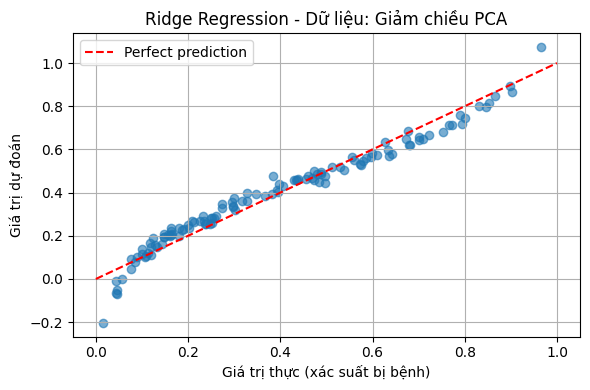


=== K·∫øt qu·∫£ tr√™n D·ªÆ LI·ªÜU: Gi·∫£m chi·ªÅu LDA ===


‚û°Ô∏è  T·ªâ l·ªá train:test = 4:1 (80:20)

‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Linear Regression
‚úÖ MSE (Mean Squared Error): 0.0048
‚úÖ R¬≤ Score: 0.9411

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu LDA', m√¥ h√¨nh 'Linear Regression':
   - MSE hi·ªán t·∫°i: 0.0048, R¬≤ hi·ªán t·∫°i: 0.9411
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0063, R¬≤ tham chi·∫øu: 0.9298
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


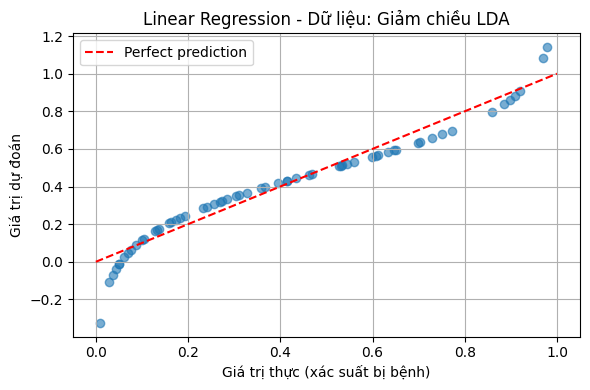


‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Ridge Regression
‚úÖ MSE (Mean Squared Error): 0.0047
‚úÖ R¬≤ Score: 0.9414

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu LDA', m√¥ h√¨nh 'Ridge Regression':
   - MSE hi·ªán t·∫°i: 0.0047, R¬≤ hi·ªán t·∫°i: 0.9414
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0062, R¬≤ tham chi·∫øu: 0.9305
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


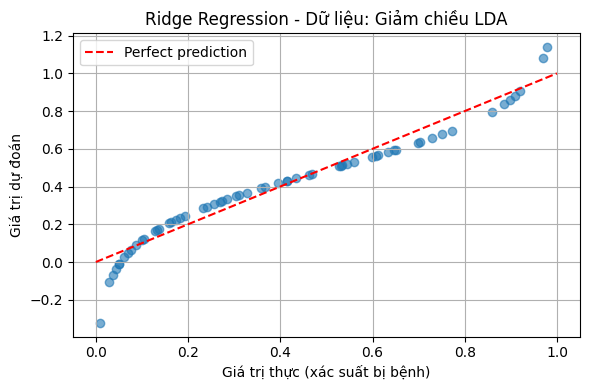


‚û°Ô∏è  T·ªâ l·ªá train:test = 7:3 (70:30)

‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Linear Regression
‚úÖ MSE (Mean Squared Error): 0.0036
‚úÖ R¬≤ Score: 0.9509

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu LDA', m√¥ h√¨nh 'Linear Regression':
   - MSE hi·ªán t·∫°i: 0.0036, R¬≤ hi·ªán t·∫°i: 0.9509
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0072, R¬≤ tham chi·∫øu: 0.9124
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


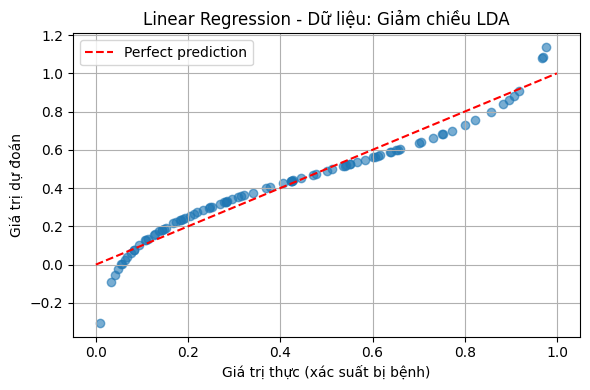


‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Ridge Regression
‚úÖ MSE (Mean Squared Error): 0.0036
‚úÖ R¬≤ Score: 0.9510

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu LDA', m√¥ h√¨nh 'Ridge Regression':
   - MSE hi·ªán t·∫°i: 0.0036, R¬≤ hi·ªán t·∫°i: 0.9510
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0071, R¬≤ tham chi·∫øu: 0.9133
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


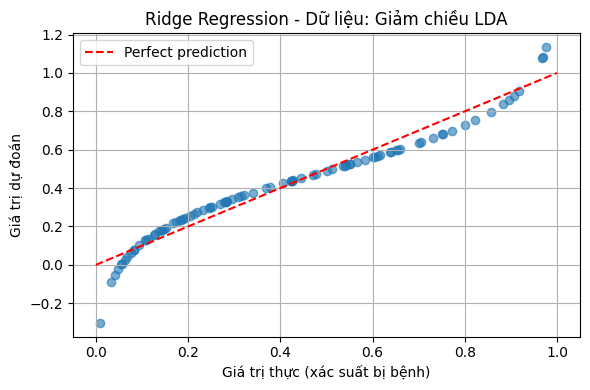


‚û°Ô∏è  T·ªâ l·ªá train:test = 6:4 (60:40)

‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Linear Regression
‚úÖ MSE (Mean Squared Error): 0.0041
‚úÖ R¬≤ Score: 0.9471

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu LDA', m√¥ h√¨nh 'Linear Regression':
   - MSE hi·ªán t·∫°i: 0.0041, R¬≤ hi·ªán t·∫°i: 0.9471
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0064, R¬≤ tham chi·∫øu: 0.9239
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


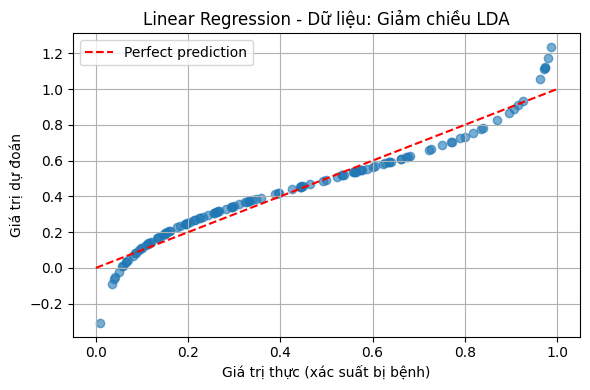


‚ñ∂Ô∏è H·ªìi quy b·∫±ng: Ridge Regression
‚úÖ MSE (Mean Squared Error): 0.0041
‚úÖ R¬≤ Score: 0.9475

üëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu 'Gi·∫£m chi·ªÅu LDA', m√¥ h√¨nh 'Ridge Regression':
   - MSE hi·ªán t·∫°i: 0.0041, R¬≤ hi·ªán t·∫°i: 0.9475
   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): 0.0063, R¬≤ tham chi·∫øu: 0.9249
   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).
      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.


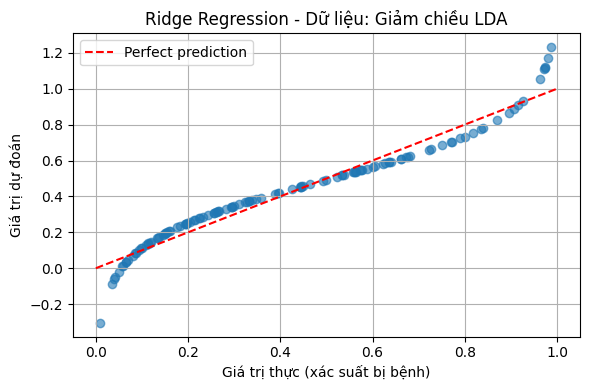

In [31]:
print("\n\n===== CHUY·ªÇN B√ÄI TO√ÅN PH√ÇN LO·∫†I ‚Üí H·ªíI QUY (theo x√°c su·∫•t b·ªã b·ªánh) =====")

# M√¥ h√¨nh h·ªìi quy s·∫Ω d√πng
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0)
}

# Ti√™u chu·∫©n ƒë√°nh gi√°
def explain_result(mse, r2, mse_ref, r2_ref, data_label, model_name):
    print(f"\nüëâ Ph√¢n t√≠ch k·∫øt qu·∫£ cho d·ªØ li·ªáu '{data_label}', m√¥ h√¨nh '{model_name}':")
    print(f"   - MSE hi·ªán t·∫°i: {mse:.4f}, R¬≤ hi·ªán t·∫°i: {r2:.4f}")
    print(f"   - MSE tham chi·∫øu (d·ªØ li·ªáu nguy√™n b·∫£n): {mse_ref:.4f}, R¬≤ tham chi·∫øu: {r2_ref:.4f}")

    if mse < mse_ref and r2 > r2_ref:
        print("   => M√¥ h√¨nh h·ªìi quy tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu cho k·∫øt qu·∫£ t·ªët h∆°n (MSE gi·∫£m, R¬≤ tƒÉng).")
        print("      ƒêi·ªÅu n√†y c√≥ th·ªÉ do gi·∫£m chi·ªÅu gi√∫p lo·∫°i b·ªè nhi·ªÖu v√† gi·ªØ l·∫°i ƒë·∫∑c tr∆∞ng quan tr·ªçng.")
    elif mse > mse_ref and r2 < r2_ref:
        print("   => K·∫øt qu·∫£ t·ªá h∆°n tr√™n d·ªØ li·ªáu gi·∫£m chi·ªÅu (MSE tƒÉng, R¬≤ gi·∫£m).")
        print("      C√≥ th·ªÉ do m·∫•t th√¥ng tin quan tr·ªçng khi gi·∫£m chi·ªÅu d·∫´n ƒë·∫øn d·ª± ƒëo√°n k√©m ch√≠nh x√°c h∆°n.")
    else:
        print("   => K·∫øt qu·∫£ c√≥ s·ª± thay ƒë·ªïi kh√¥ng r√µ r√†ng gi·ªØa d·ªØ li·ªáu nguy√™n b·∫£n v√† gi·∫£m chi·ªÅu.")
        print("      ƒêi·ªÅu n√†y c√≥ th·ªÉ do ƒë·∫∑c ƒëi·ªÉm d·ªØ li·ªáu ho·∫∑c t·ªâ l·ªá train:test ·∫£nh h∆∞·ªüng ƒë·∫øn hi·ªáu qu·∫£ m√¥ h√¨nh.")

reference_metrics = {}

# Th·ª±c hi·ªán m√¥ h√¨nh
for data_label, X in datasets.items():
    print(f"\n=== K·∫øt qu·∫£ tr√™n D·ªÆ LI·ªÜU: {data_label} ===\n")
    for ratio, label in zip(ratios, ratio_labels):
        print(f"\n‚û°Ô∏è  T·ªâ l·ªá train:test = {label}")
        # Chia d·ªØ li·ªáu
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=ratio, random_state=42
        )

        # Hu·∫•n luy·ªán Logistic Regression ƒë·ªÉ l·∫•y x√°c su·∫•t
        clf = LogisticRegression(max_iter=1000, solver='lbfgs')
        clf.fit(X_train, y_train)

        # L·∫•y x√°c su·∫•t d·ª± ƒëo√°n l·ªõp "B·ªã" (label = 1)
        y_train_score = clf.predict_proba(X_train)[:, 1]
        y_test_score = clf.predict_proba(X_test)[:, 1]

        for model_name, model in reg_models.items():
            print(f"\n‚ñ∂Ô∏è H·ªìi quy b·∫±ng: {model_name}")

            # Hu·∫•n luy·ªán h·ªìi quy
            model.fit(X_train, y_train_score)
            y_pred_score = model.predict(X_test)

            # ƒê√°nh gi√°
            mse = mean_squared_error(y_test_score, y_pred_score)
            r2 = r2_score(y_test_score, y_pred_score)

            print(f"‚úÖ MSE (Mean Squared Error): {mse:.4f}")
            print(f"‚úÖ R¬≤ Score: {r2:.4f}")

            # N·∫øu l√† d·ªØ li·ªáu nguy√™n b·∫£n, l∆∞u l√†m tham chi·∫øu
            if data_label == 'G·ªëc':
                reference_metrics[(label, model_name)] = (mse, r2)
            else:
                # D·ªØ li·ªáu gi·∫£m chi·ªÅu => l·∫•y tham chi·∫øu ƒë·ªÉ so s√°nh
                mse_ref, r2_ref = reference_metrics.get((label, model_name), (None, None))
                if mse_ref is not None:
                    explain_result(mse, r2, mse_ref, r2_ref, data_label, model_name)

            # V·∫Ω bi·ªÉu ƒë·ªì so s√°nh gi√° tr·ªã th·∫≠t vs d·ª± ƒëo√°n
            plt.figure(figsize=(6, 4))
            plt.scatter(y_test_score, y_pred_score, alpha=0.6)
            plt.plot([0, 1], [0, 1], 'r--', label='Perfect prediction')
            plt.title(f'{model_name} - D·ªØ li·ªáu: {data_label}')
            plt.xlabel('Gi√° tr·ªã th·ª±c (x√°c su·∫•t b·ªã b·ªánh)')
            plt.ylabel('Gi√° tr·ªã d·ª± ƒëo√°n')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()